In [17]:
# imported nana tanan ayaw na pag import pisti yawa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats


In [18]:
# Load the uploaded file
file_path = '202408_CombinedData.csv'

# Load the data
data = pd.read_csv(file_path)
df = pd.DataFrame(data)

# Filter for the top 20 major cities in the Philippines
major_cities = [
    'Manila', 'Quezon City', 'Cebu City', 'Davao City', 'Makati', 'Taguig', 'Pasig',
    'Meycauyan', 'Mandaluyong', 'Caloocan', 'Las Piñas', 'Calamba', 'Parañaque',
    'Baguio City', 'Angeles City', 'Iloilo City', 'Cagayan de Oro', 'Zamboanga City',
    'Bacolod', 'Antipolo'
]

# Filter the data for these cities
filtered_data = data[data['city_name'].isin(major_cities)]

# Summary statistics for the filtered data
summary_stats = filtered_data[['main.aqi', 'components.co',  'components.no', 'components.o3', 'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3', 'city_name']].describe()

# Output the statistics
summary_stats


,main.aqi,components.co,components.no,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
count,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,2.109559,743.921338,3.944283,30.215860,9.131986,27.257092,33.901092,6.695537
std,1.375747,721.666489,11.902627,38.181513,13.114225,40.437561,47.451296,7.399655
min,1.000000,211.950000,0.000000,0.000000,0.060000,0.500000,0.750000,0.000000
25%,1.000000,320.440000,0.020000,7.712500,1.480000,3.502500,5.352500,1.870000
50%,2.000000,453.950000,0.170000,20.030000,3.580000,9.495000,12.995000,4.005000
75%,3.000000,841.140000,1.087500,37.910000,11.300000,33.250000,40.595000,8.990000
max,5.000000,5126.950000,126.960000,343.320000,125.890000,300.310000,322.870000,55.730000


In [19]:
import numpy as np
import pandas as pd
from scipy import stats

# Rename columns for readability
filtered_data = filtered_data.rename(columns={
    'main.aqi': 'AQI',
    'components.co': 'Carbon Monoxide (CO)',
    'components.no': 'Nitric Oxide (NO)',
    'components.no2': 'Nitrogen Dioxide (NO₂)',
    'components.o3': 'Ozone (O₃)',
    'components.so2': 'Sulfur Dioxide (SO₂)',
    'components.pm2_5': 'PM2.5',
    'components.pm10': 'PM10',
    'components.nh3': 'Ammonia (NH₃)'
})

# Columns with readable chemical names
chemical_columns_readable = ['AQI', 'Carbon Monoxide (CO)', 'Nitric Oxide (NO)',
                             'Nitrogen Dioxide (NO₂)', 'Ozone (O₃)', 'Sulfur Dioxide (SO₂)',
                             'PM2.5', 'PM10', 'Ammonia (NH₃)']

# Dictionary to store statistics with readable names
statistics_readable = {}

# Calculating descriptive statistics for each readable chemical column
for column in chemical_columns_readable:
    column_data = filtered_data[column].dropna()

    # Ensure mode is always treated as an array
    mode_result = stats.mode(column_data, nan_policy='omit')
    mode_value = np.atleast_1d(mode_result.mode)[0] if mode_result.mode.size > 0 else np.nan

    # Compile statistics for each column
    stats_dict = {
        'mean': np.mean(column_data),
        'median': np.median(column_data),
        'mode': mode_value,
        'std_dev': np.std(column_data, ddof=1),
        'variance': np.var(column_data, ddof=1),
        'min': np.min(column_data),
        'max': np.max(column_data),
        'range': np.ptp(column_data),
        '25th_percentile': np.percentile(column_data, 25),
        '50th_percentile': np.percentile(column_data, 50),
        '75th_percentile': np.percentile(column_data, 75)
    }
    statistics_readable[column] = stats_dict

# Convert the statistics dictionary into a DataFrame for better visualization
statistics_readable_df = pd.DataFrame(statistics_readable).T

# Display the statistics DataFrame with readable chemical names
statistics_readable_df


,mean,median,mode,std_dev,variance,min,max,range,25th_percentile,50th_percentile,75th_percentile
AQI,2.109559,2.000,1.00,1.375747,1.892681,1.00,5.00,4.00,1.0000,2.000,3.0000
Carbon Monoxide (CO),743.921338,453.950,270.37,721.666489,520802.521973,211.95,5126.95,4915.00,320.4400,453.950,841.1400
Nitric Oxide (NO),3.944283,0.170,0.00,11.902627,141.672540,0.00,126.96,126.96,0.0200,0.170,1.0875
Nitrogen Dioxide (NO₂),15.277169,8.910,6.60,18.534413,343.524453,0.16,148.06,147.90,3.5600,8.910,19.3600
Ozone (O₃),30.215860,20.030,0.00,38.181513,1457.827958,0.00,343.32,343.32,7.7125,20.030,37.9100
Sulfur Dioxide (SO₂),9.131986,3.580,2.53,13.114225,171.982889,0.06,125.89,125.83,1.4800,3.580,11.3000
PM2.5,27.257092,9.495,0.85,40.437561,1635.196352,0.50,300.31,299.81,3.5025,9.495,33.2500
PM10,33.901092,12.995,9.61,47.451296,2251.625492,0.75,322.87,322.12,5.3525,12.995,40.5950
Ammonia (NH₃),6.695537,4.005,2.98,7.399655,54.754901,0.00,55.73,55.73,1.8700,4.005,8.9900


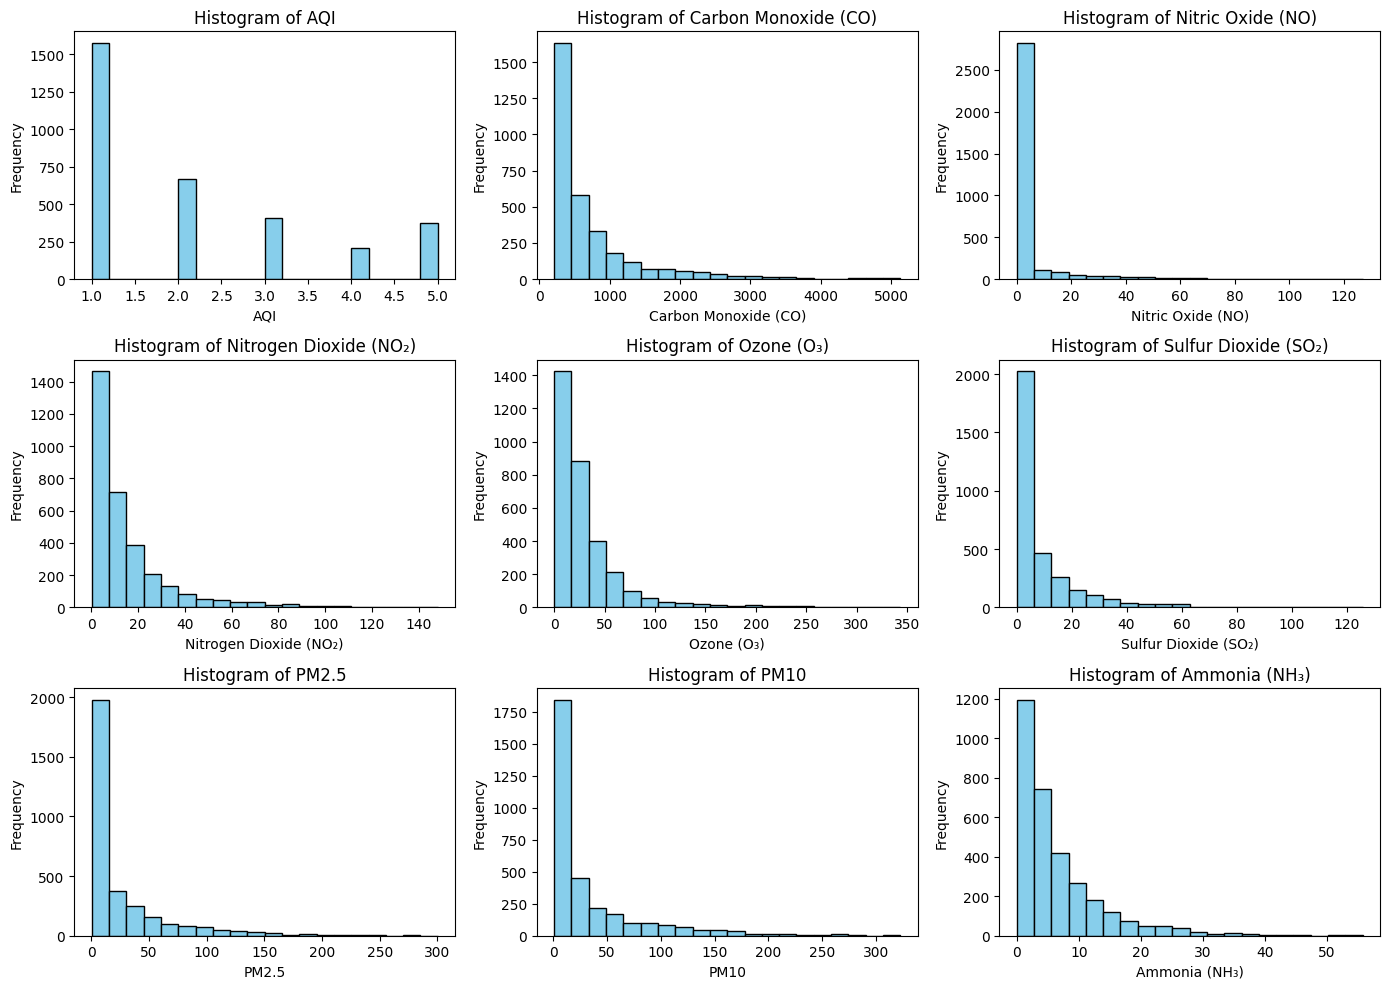

In [20]:
# Visual Presentation: Histogram for each chemical component
plt.figure(figsize=(14, 10))
for i, column in enumerate(chemical_columns_readable, 1):
    plt.subplot(3, 3, i)
    plt.hist(filtered_data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

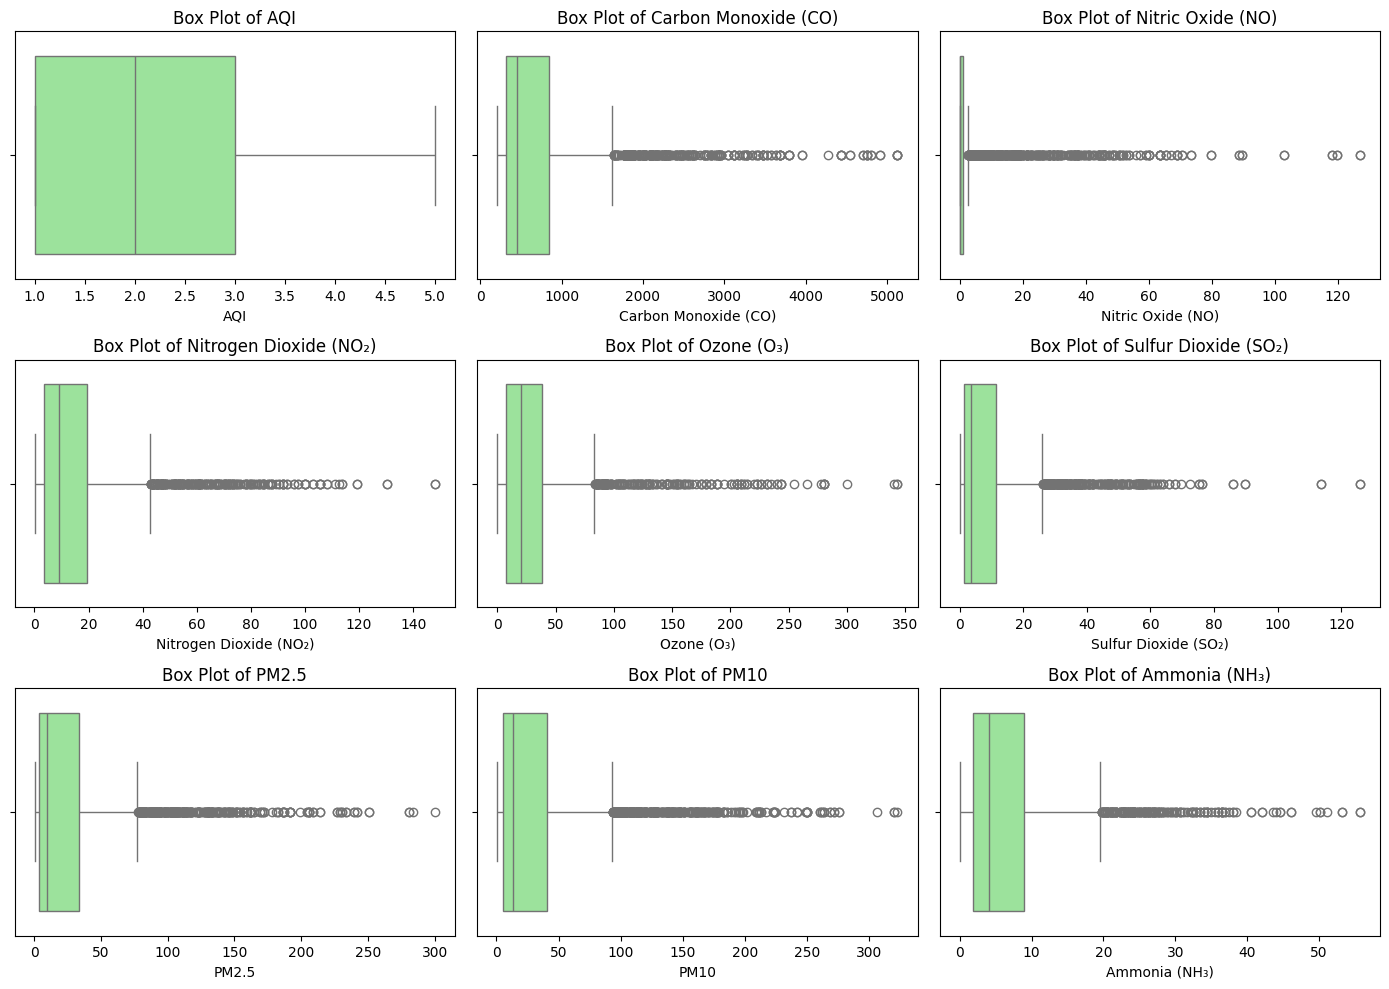

In [21]:
# Visual Presentation: Boxplot for each chemical component
plt.figure(figsize=(14, 10))
for i, column in enumerate(chemical_columns_readable, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=filtered_data[column].dropna(), color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

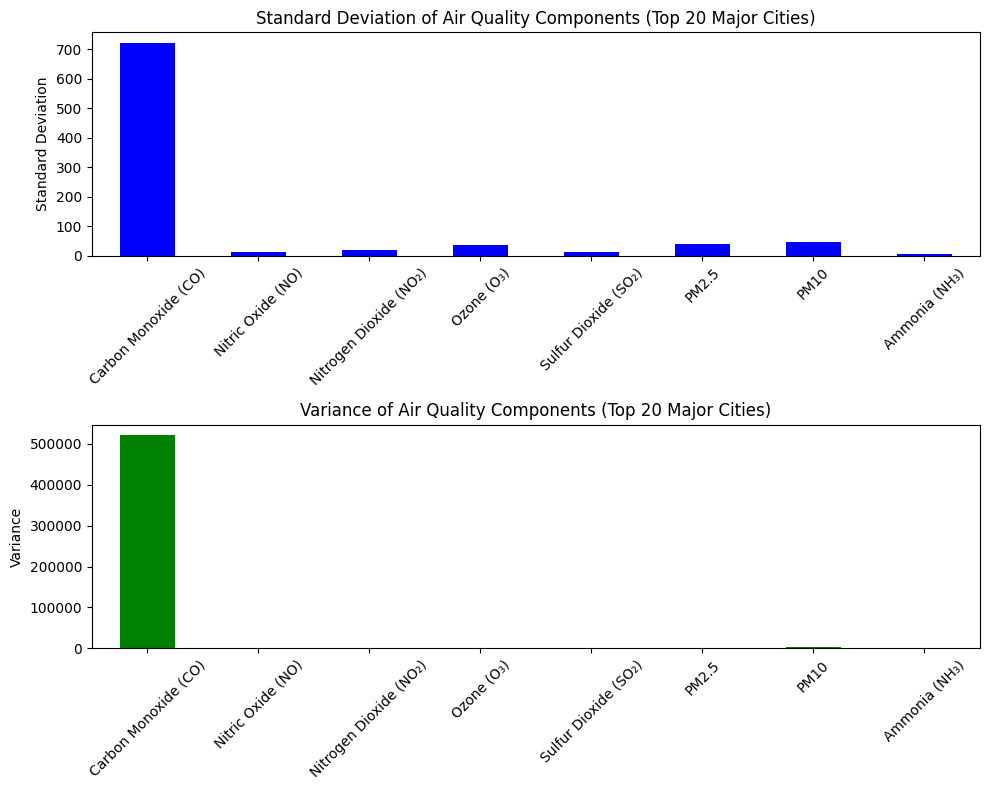

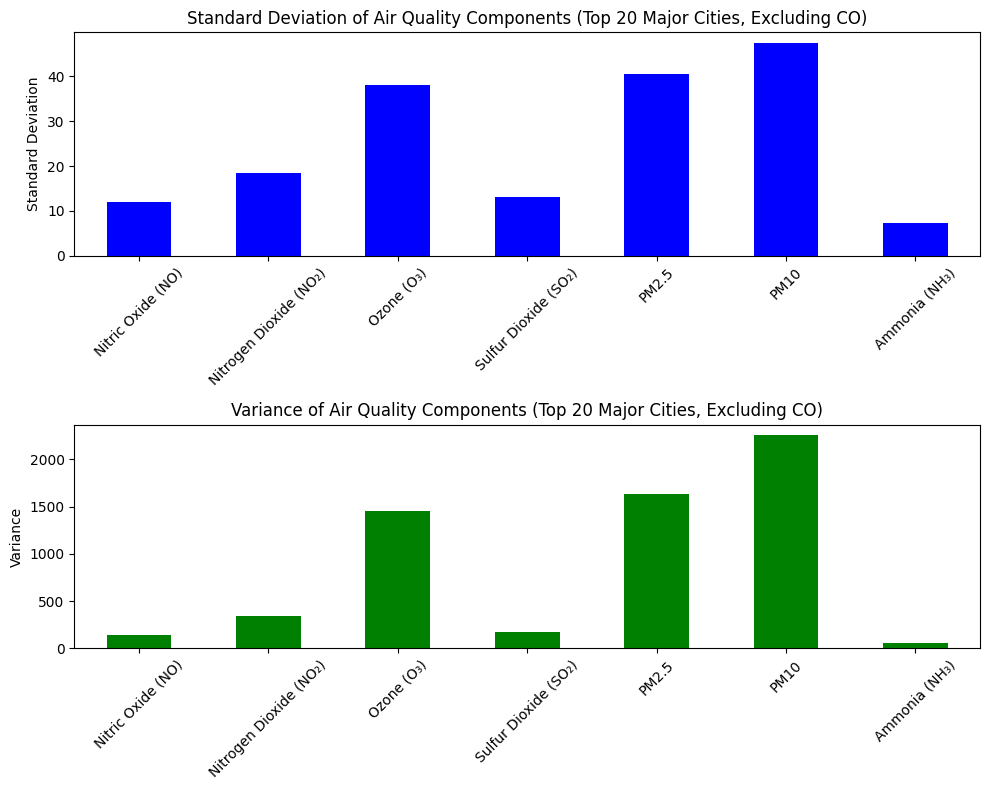

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '202408_CombinedData.csv'
data = pd.read_csv(file_path)


# Columns to analyze
all_columns_to_analyze = ['Carbon Monoxide (CO)', 'Nitric Oxide (NO)', 'Nitrogen Dioxide (NO₂)',
                           'Ozone (O₃)', 'Sulfur Dioxide (SO₂)', 'PM2.5', 'PM10', 'Ammonia (NH₃)']

# Columns to analyze excluding CO
columns_to_analyze_excluding_co = ['Nitric Oxide (NO)', 'Nitrogen Dioxide (NO₂)',
                                     'Ozone (O₃)', 'Sulfur Dioxide (SO₂)',
                                     'PM2.5', 'PM10', 'Ammonia (NH₃)']

# Calculate standard deviations and variances for the selected columns (including CO)
std_devs_all = filtered_data[all_columns_to_analyze].std()
variances_all = filtered_data[all_columns_to_analyze].var()

# Create bar plots for standard deviation and variance for all components
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Standard Deviation Plot for all components
std_devs_all.plot.bar(ax=axes[0], color='blue')
axes[0].set_title('Standard Deviation of Air Quality Components (Top 20 Major Cities)')
axes[0].set_ylabel('Standard Deviation')
axes[0].tick_params(axis='x', rotation=45)

# Variance Plot for all components
variances_all.plot.bar(ax=axes[1], color='green')
axes[1].set_title('Variance of Air Quality Components (Top 20 Major Cities)')
axes[1].set_ylabel('Variance')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate standard deviations and variances for the selected columns (excluding CO)
std_devs_excluding_co = filtered_data[columns_to_analyze_excluding_co].std()
variances_excluding_co = filtered_data[columns_to_analyze_excluding_co].var()

# Create bar plots for standard deviation and variance for components excluding CO
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Standard Deviation Plot for excluding CO
std_devs_excluding_co.plot.bar(ax=axes[0], color='blue')
axes[0].set_title('Standard Deviation of Air Quality Components (Top 20 Major Cities, Excluding CO)')
axes[0].set_ylabel('Standard Deviation')
axes[0].tick_params(axis='x', rotation=45)

# Variance Plot for excluding CO
variances_excluding_co.plot.bar(ax=axes[1], color='green')
axes[1].set_title('Variance of Air Quality Components (Top 20 Major Cities, Excluding CO)')
axes[1].set_ylabel('Variance')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


What are Spikes?
In the context of air quality, a "spike" refers to a sudden increase in the concentration of a specific pollutant that exceeds normal levels. These spikes often indicate an event where pollution levels are unusually high, which can be attributed to specific sources or activities (e.g., industrial emissions, traffic congestion, etc.).

Formula for Identifying Spikes
To identify spikes, we use statistical thresholds based on the mean and standard deviation of the pollutant concentrations over time. The logic is that a value significantly above the average is considered a spike.

The formula for detecting spikes is:


Where:

- μ is the mean value of the pollutant's concentration.
- σ is the standard deviation of the pollutant's concentration.
- 2σ is chosen as a common threshold to capture values that are significantly above the average. You can adjust this factor (e.g., 1σ, 3σ) depending on the sensitivity you want in detecting spikes.

Steps to Identify Spikes:

1. Calculate the Mean (𝜇): Compute the average concentration for each pollutant over the dataset. The mean gives us the central tendency or normal level of each pollutant.
   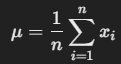

2. Calculate the Standard Deviation (𝜎): The standard deviation measures the amount of variation or dispersion in the pollutant concentration data.
   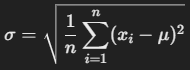

3. Set the Spike Threshold: Using the formula 𝜇+2𝜎, identify the threshold. Any value of the pollutant concentration that exceeds this threshold is considered a spike.

For example, if the mean concentration for NO2 is 25 μg/m³ and the standard deviation is 5 μg/m³, the threshold would be:


4. Identify Spikes in the Data: Compare each data point to the threshold for its corresponding pollutant. If the pollutant concentration exceeds the threshold, it is flagged as a spike.

Visualizing Frequent Spikes:
Once spikes are detected, you can count how often each pollutant exceeds its threshold. This helps identify which pollutants experience frequent spikes, indicating potential air quality issues that may be linked to specific sources (e.g., traffic, industrial plants).


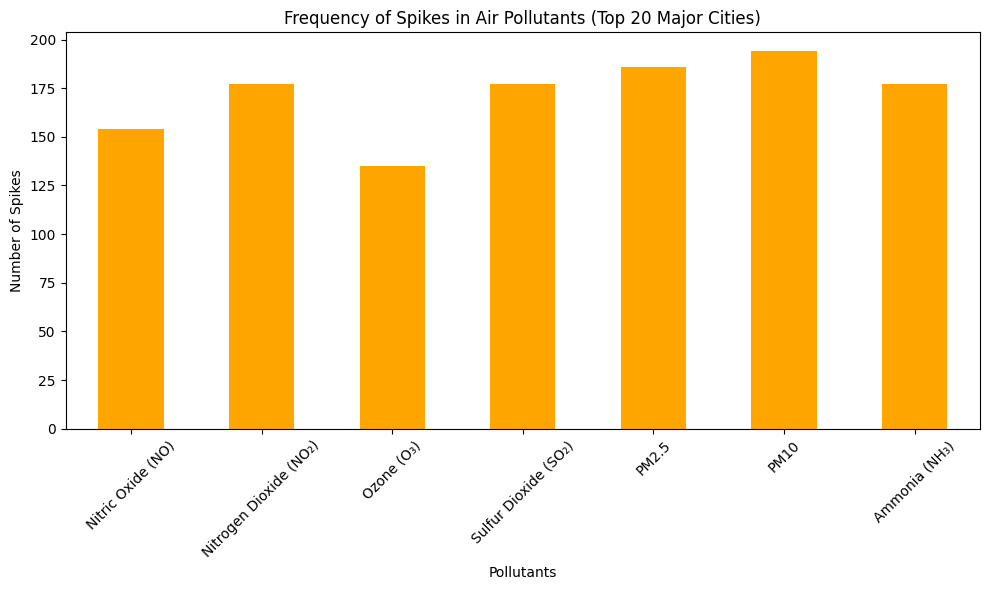

In [23]:
import pandas as pd
import matplotlib.pyplot as plt



# Columns to analyze
pollutants = ['Nitric Oxide (NO)', 'Nitrogen Dioxide (NO₂)', 'Ozone (O₃)',
              'Sulfur Dioxide (SO₂)', 'PM2.5', 'PM10', 'Ammonia (NH₃)']

# Calculate the mean and standard deviation for each pollutant
mean_vals = filtered_data[pollutants].mean()
std_vals = filtered_data[pollutants].std()

# Set threshold for spikes: 2 standard deviations above the mean
thresholds = mean_vals + 2 * std_vals

# Identify rows where any pollutant exceeds its spike threshold
spikes = filtered_data[(filtered_data[pollutants] > thresholds).any(axis=1)]

# Count how often each pollutant spikes to assess 'frequent' pollutants
spike_counts = (spikes[pollutants] > thresholds).sum()

# Plot spike counts to visualize which pollutants spike more frequently
spike_counts.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Frequency of Spikes in Air Pollutants (Top 20 Major Cities)')
plt.ylabel('Number of Spikes')
plt.xlabel('Pollutants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


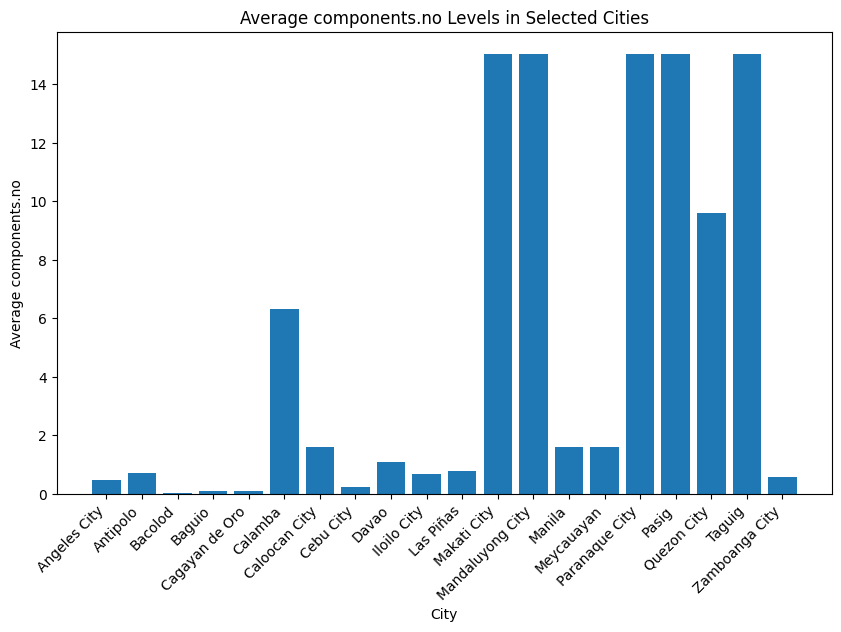

In [24]:
desired_cities = ["Manila", "Quezon City", "Cebu City",
                  "Davao", "Makati City", "Taguig", "Pasig", "Calamba",
                  "Mandaluyong City", "Caloocan City", "Las Piñas", "Meycauayan",
                  "Paranaque City", "Baguio", "Angeles City", "Iloilo City",
                  "Cagayan de Oro", "Zamboanga City", "Bacolod", "Antipolo"]

# Filter data for the desired cities
filtered_df = df[df['city_name'].isin(desired_cities)]

# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_NO= 'components.no'


# Group data by city and calculate the average pollutant level
average_NO = filtered_df.groupby('city_name')[pollutant_NO].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_NO.index, average_NO.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_NO}')
plt.title(f'Average {pollutant_NO} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

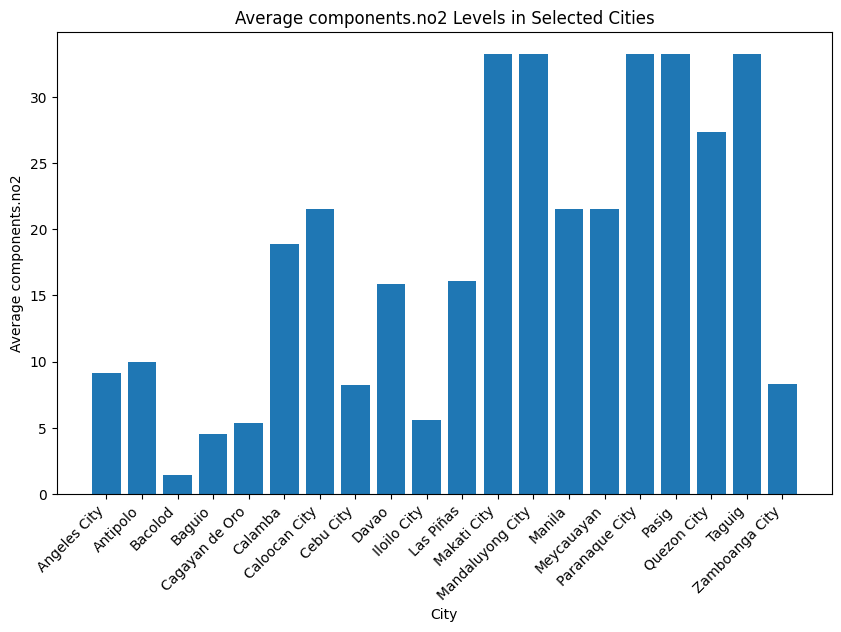

In [25]:
desired_cities = ["Manila", "Quezon City", "Cebu City",
                  "Davao", "Makati City", "Taguig", "Pasig", "Calamba",
                  "Mandaluyong City", "Caloocan City", "Las Piñas", "Meycauayan",
                  "Paranaque City", "Baguio", "Angeles City", "Iloilo City",
                  "Cagayan de Oro", "Zamboanga City", "Bacolod", "Antipolo"]

# Filter data for the desired cities
filtered_df = df[df['city_name'].isin(desired_cities)]

# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_NO2= 'components.no2'

# Group data by city and calculate the average pollutant level
average_NO2 = filtered_df.groupby('city_name')[pollutant_NO2].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_NO2.index, average_NO2.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_NO2}')
plt.title(f'Average {pollutant_NO2} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

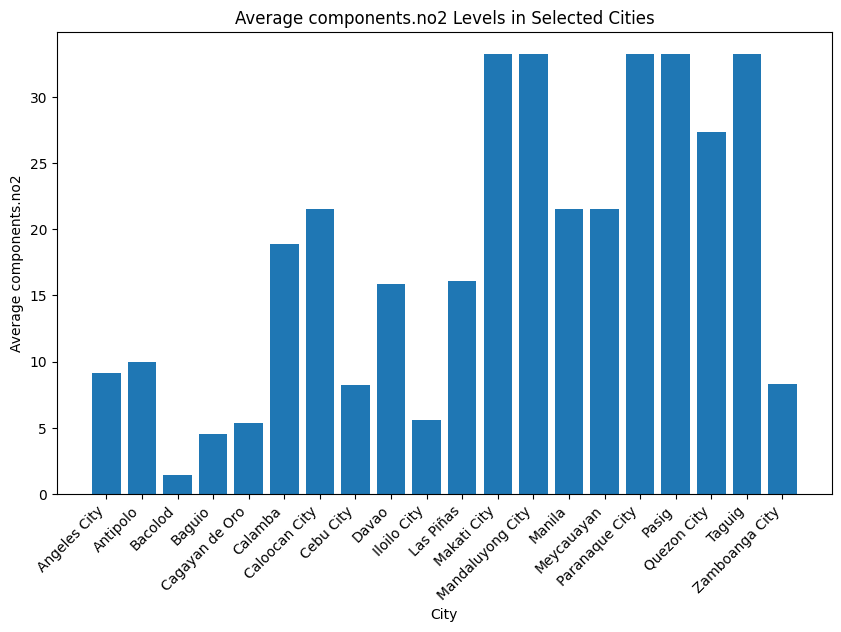

In [26]:
desired_cities = ["Manila", "Quezon City", "Cebu City",
                  "Davao", "Makati City", "Taguig", "Pasig", "Calamba",
                  "Mandaluyong City", "Caloocan City", "Las Piñas", "Meycauayan",
                  "Paranaque City", "Baguio", "Angeles City", "Iloilo City",
                  "Cagayan de Oro", "Zamboanga City", "Bacolod", "Antipolo"]

# Filter data for the desired cities
filtered_df = df[df['city_name'].isin(desired_cities)]

# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_NO2= 'components.no2'

# Group data by city and calculate the average pollutant level
average_NO2 = filtered_df.groupby('city_name')[pollutant_NO2].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_NO2.index, average_NO2.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_NO2}')
plt.title(f'Average {pollutant_NO2} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

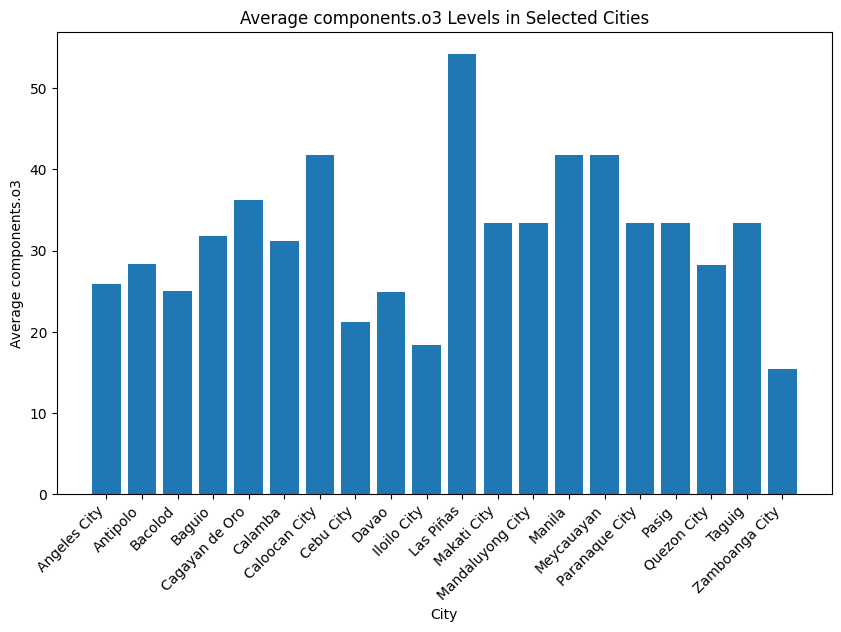

In [27]:
desired_cities = ["Manila", "Quezon City", "Cebu City",
                  "Davao", "Makati City", "Taguig", "Pasig", "Calamba",
                  "Mandaluyong City", "Caloocan City", "Las Piñas", "Meycauayan",
                  "Paranaque City", "Baguio", "Angeles City", "Iloilo City",
                  "Cagayan de Oro", "Zamboanga City", "Bacolod", "Antipolo"]

# Filter data for the desired cities
filtered_df = df[df['city_name'].isin(desired_cities)]

# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_O3= 'components.o3'

# Group data by city and calculate the average pollutant level
average_O3 = filtered_df.groupby('city_name')[pollutant_O3].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_O3.index, average_O3.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_O3}')
plt.title(f'Average {pollutant_O3} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

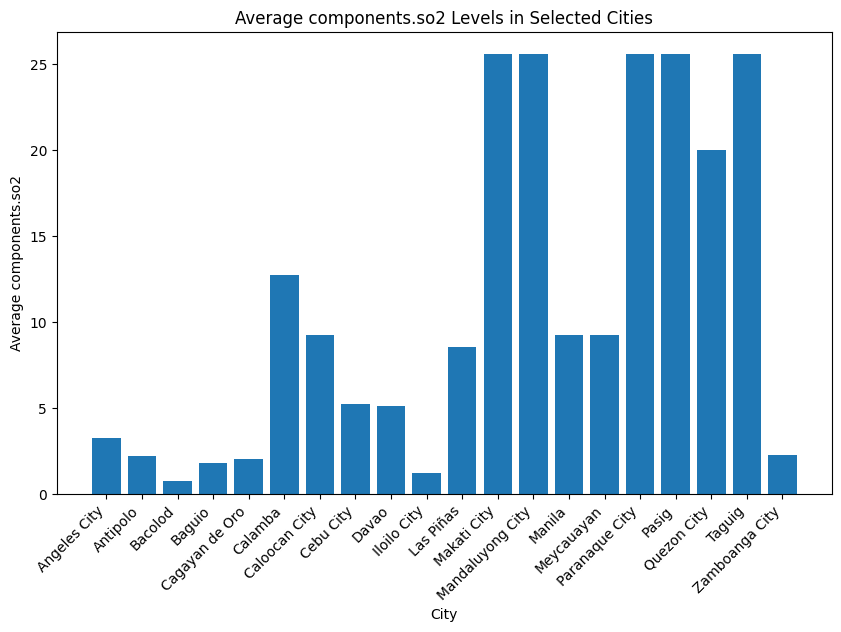

In [28]:
desired_cities = ["Manila", "Quezon City", "Cebu City",
                  "Davao", "Makati City", "Taguig", "Pasig", "Calamba",
                  "Mandaluyong City", "Caloocan City", "Las Piñas", "Meycauayan",
                  "Paranaque City", "Baguio", "Angeles City", "Iloilo City",
                  "Cagayan de Oro", "Zamboanga City", "Bacolod", "Antipolo"]

# Filter data for the desired cities
filtered_df = df[df['city_name'].isin(desired_cities)]

# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_SO2= 'components.so2'

# Group data by city and calculate the average pollutant level
average_SO2 = filtered_df.groupby('city_name')[pollutant_SO2].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_SO2.index, average_SO2.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_SO2}')
plt.title(f'Average {pollutant_SO2} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

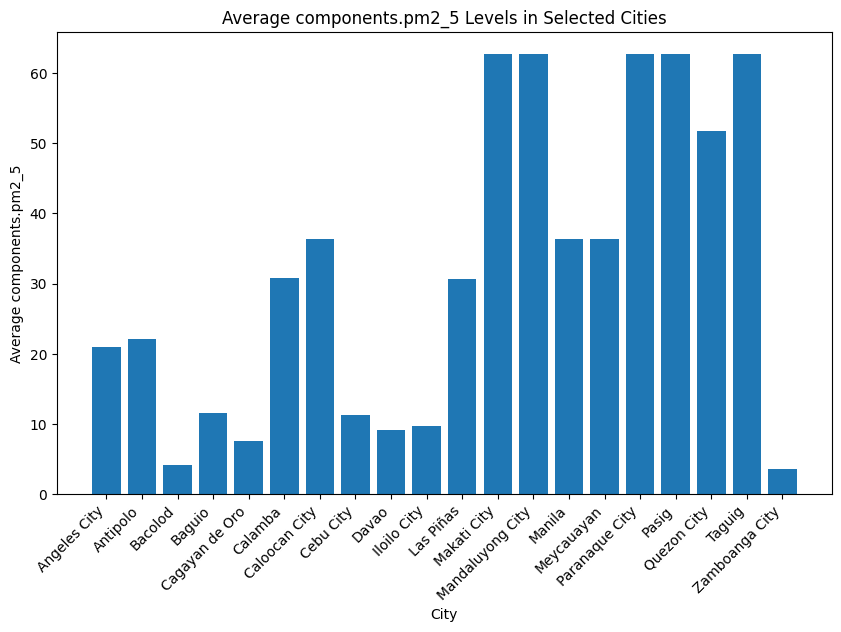

In [29]:
desired_cities = ["Manila", "Quezon City", "Cebu City",
                  "Davao", "Makati City", "Taguig", "Pasig", "Calamba",
                  "Mandaluyong City", "Caloocan City", "Las Piñas", "Meycauayan",
                  "Paranaque City", "Baguio", "Angeles City", "Iloilo City",
                  "Cagayan de Oro", "Zamboanga City", "Bacolod", "Antipolo"]

# Filter data for the desired cities
filtered_df = df[df['city_name'].isin(desired_cities)]

# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_PM2_5= 'components.pm2_5'

# Group data by city and calculate the average pollutant level
average_PM2_5 = filtered_df.groupby('city_name')[pollutant_PM2_5].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_PM2_5.index, average_PM2_5.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_PM2_5}')
plt.title(f'Average {pollutant_PM2_5} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

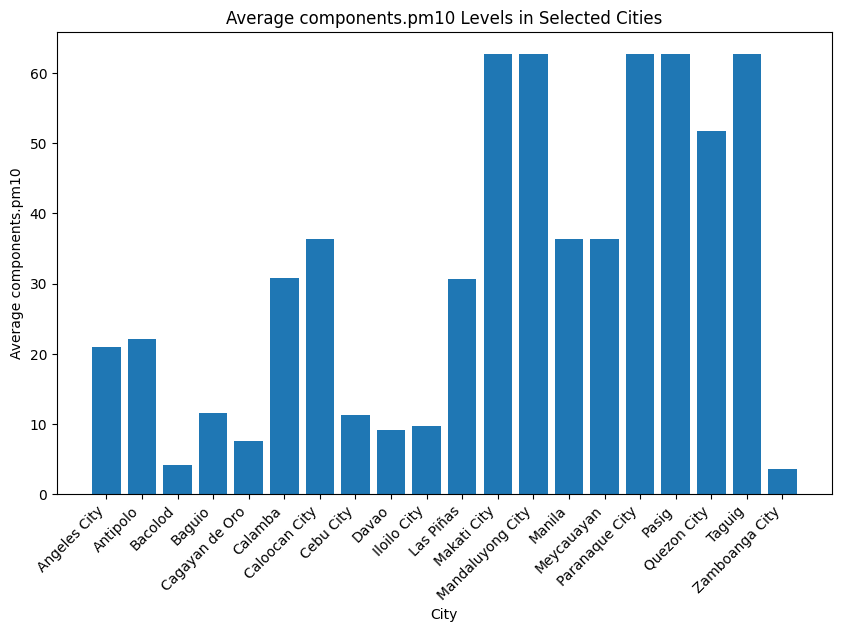

In [30]:
desired_cities = ["Manila", "Quezon City", "Cebu City",
                  "Davao", "Makati City", "Taguig", "Pasig", "Calamba",
                  "Mandaluyong City", "Caloocan City", "Las Piñas", "Meycauayan",
                  "Paranaque City", "Baguio", "Angeles City", "Iloilo City",
                  "Cagayan de Oro", "Zamboanga City", "Bacolod", "Antipolo"]

# Filter data for the desired cities
filtered_df = df[df['city_name'].isin(desired_cities)]

# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_PM10= 'components.pm10'

# Group data by city and calculate the average pollutant level
average_PM10 = filtered_df.groupby('city_name')[pollutant_PM2_5].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_PM10.index, average_PM10.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_PM10}')
plt.title(f'Average {pollutant_PM10} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

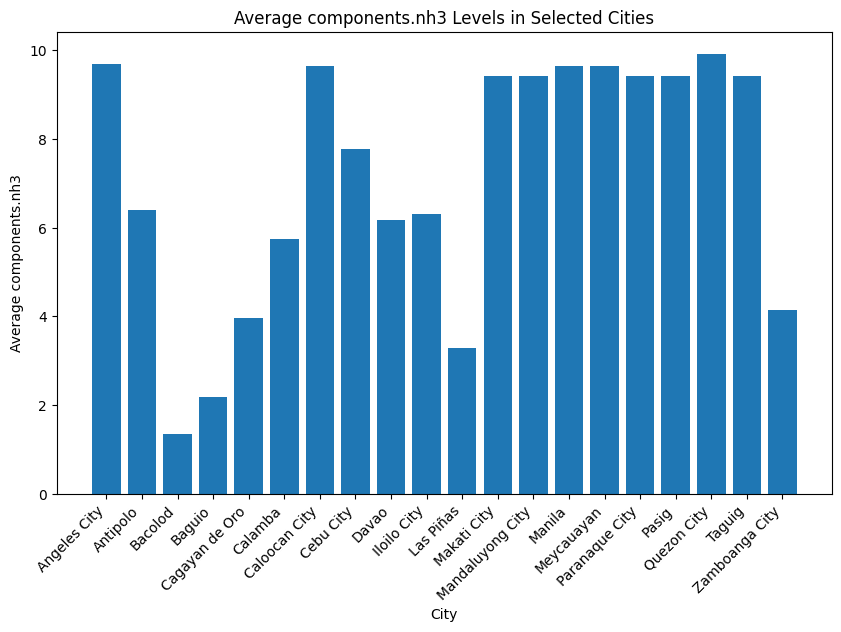

In [31]:
desired_cities = ["Manila", "Quezon City", "Cebu City",
                  "Davao", "Makati City", "Taguig", "Pasig", "Calamba",
                  "Mandaluyong City", "Caloocan City", "Las Piñas", "Meycauayan",
                  "Paranaque City", "Baguio", "Angeles City", "Iloilo City",
                  "Cagayan de Oro", "Zamboanga City", "Bacolod", "Antipolo"]

# Filter data for the desired cities
filtered_df = df[df['city_name'].isin(desired_cities)]

# Select the desired pollutant (e.g., 'components.nh3') and convert 'datetime' to datetime type
pollutant_NH3= 'components.nh3'

# Group data by city and calculate the average pollutant level
average_NH3 = filtered_df.groupby('city_name')[pollutant_NH3].mean()

# Plot the average pollutant levels for each city
plt.figure(figsize=(10, 6))
plt.bar(average_NH3.index, average_NH3.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_NH3}')
plt.title(f'Average {pollutant_NH3} Levels in Selected Cities')
plt.xticks(rotation=45, ha='right')
plt.show()